# Analysis of DNA-MERFISH for CTP11

by Pu Zheng

2022.02.15

analysis for dataset:

\\10.245.74.158\Chromatin_NAS_1\20220307-P_brain_CTP11_from_0303

This data is DNA of uncleared MERFISH RNA:
    \\10.245.74.158\Chromatin_NAS_0\20220303-P_brain_M1_nonclear_adaptor


In [1]:
%run "..\..\Startup_py3.py"
sys.path.append(r"..\..\..\..\Documents")

import ImageAnalysis3 as ia
%matplotlib notebook

from ImageAnalysis3 import *
print(os.getpid())

import h5py
from ImageAnalysis3.classes import _allowed_kwds
import ast

24452


# 0. fov parameters

In [2]:
reload(ia)
reload(classes)
reload(classes.batch_functions)
reload(classes.field_of_view)
reload(io_tools.load)
reload(get_img_info)
reload(visual_tools)
reload(ia.correction_tools)
reload(ia.correction_tools.alignment)
reload(ia.spot_tools.matching)
reload(ia.segmentation_tools.chromosome)
reload(ia.spot_tools.fitting)

fov_param = {'data_folder':[r'\\10.245.74.158\Chromatin_NAS_4\20220316-P_brain_CTP11-12-13_from_0304',
                            r'\\10.245.74.212\Chromatin_NAS_2\20220316-P_brain_CTP11-12-13_from_0304'],
             'save_folder':r'\\franklin\SSD_01\Pu_Temp\20220316-P_brain_CTP11-12-13_from_0304_warp',
             'experiment_type': 'DNA',
             'num_threads': 12,
             'correction_folder':r'\\10.245.74.158\Chromatin_NAS_0\Corrections\20210621-Corrections_lumencor_from_60_to_50',
             'shared_parameters':{
                     'single_im_size':[50,2048,2048],
                     'distance_zxy': [250, 108, 108],
                     'corr_channels':['750','647','561'],
                     'num_empty_frames': 0, 
                     'num_buffer_frames':0,
                     'corr_hot_pixel':True,
                     'corr_Z_shift':False,
                     'corr_bleed':True,
                     'min_num_seeds':5,
                     'max_num_seeds': 20000,
                     'spot_seeding_th': 1000,
                     'normalize_intensity_local':False,
                     'normalize_intensity_background':False,
                     'corr_gaussian_highpass':False,
                 }, 
             }

# 1. Process Fov

In [3]:
_overwrite = False

_save_images = True

_fit_spots = True

_warp_images = True

_fov_id = 20

fov = classes.field_of_view.Field_of_View(fov_param, _fov_id=_fov_id,
                                          _color_info_kwargs={
                                              '_color_filename':'Color_Usage',
                                          }, 
                                          _prioritize_saved_attrs=False,
                                          _save_info_to_file=False, # whether overwrite
                                          )

Get Folder Names: (ia.get_img_info.get_folders)
- Number of folders: 57
- Number of field of views: 168
Get Folder Names: (ia.get_img_info.get_folders)
- Number of folders: 20
- Number of field of views: 169
- Importing csv format color_usage file: \\10.245.74.158\Chromatin_NAS_4\20220316-P_brain_CTP11-12-13_from_0304\Analysis\Color_Usage.csv
- header: ['Hyb', '750', '647', '561', '488', '405']
dict_keys(['H0U1', 'H1C2', 'H2C3', 'H3C4', 'H4C5', 'H5C6', 'H6C7', 'H7C8', 'H8C9', 'H9C10', 'H10C11', 'H11C12', 'H12C13', 'H13C14', 'H14C15', 'H15C16', 'H16C17', 'H17C18', 'H18C19', 'H19C20', 'H20C21', 'H21C22', 'H22C23', 'H23C24', 'H24C25', 'H25C26', 'H26C27', 'H27C28', 'H28C29', 'H29C30', 'H30C31', 'H31C32', 'H32C33', 'H33C34', 'H34C35', 'H35C36', 'H36C37', 'H37C38', 'H38C39', 'H39C40', 'H40C41', 'H41C42', 'H42C43', 'H43C44', 'H44C45', 'H45C46', 'H46C47', 'H47C48', 'H48C49', 'H49C50', 'H50C51', 'H51C52', 'H52C53', 'H53C45_rep', 'H54C54', 'H55C55', 'H56C56', 'H57C57', 'H58C58', 'H59C59', 'H60C6

In [11]:
# 2. Process image into candidate spots
fov.parallel = False
fov.combo_ref_id = 0
fov._process_image_to_spots('combo', 
                            _load_common_reference=True, _load_with_multiple=False,
                            _save_images=_save_images,
                            _warp_images=_warp_images, 
                            _fit_spots=_fit_spots,
                            _overwrite_drift=False, _overwrite_image=_overwrite,
                            _overwrite_spot=_overwrite,
                            _verbose=True)

-- folders not selected, allow processing all 51 folders
-- checking combo, region:[ 1  2 67] in 0.050s.
-- checking combo, region:[101 102 165] in 0.033s.
-- checking combo, region:[ 3  4 68] in 0.032s.
-- checking combo, region:[ 5  6 69] in 0.021s.
-- checking combo, region:[ 7  8 70] in 0.035s.
-- checking combo, region:[ 9 10 71] in 0.031s.
-- checking combo, region:[11 12 72] in 0.031s.
-- checking combo, region:[13 14 73] in 0.039s.
-- checking combo, region:[15 16 74] in 0.030s.
-- checking combo, region:[17 18 75] in 0.027s.
-- checking combo, region:[19 20 76] in 0.021s.
-- checking combo, region:[21 22 77] in 0.022s.
-- checking combo, region:[23 24 78] in 0.031s.
-- checking combo, region:[25 26 79] in 0.031s.
-- checking combo, region:[27 28 80] in 0.031s.
-- checking combo, region:[29 30 81] in 0.026s.
-- checking combo, region:[31 32 82] in 0.028s.
-- checking combo, region:[33 34 83] in 0.029s.
-- checking combo, region:[35 36 84] in 0.027s.
-- checking combo, region:[3

OSError: [WinError 87] The parameter is incorrect

In [16]:
with h5py.File(fov.save_filename, 'r') as _f:
    _grp = _f.require_group('combo')
    _ids = list(_grp['ids'][:])
    _flags = _grp['flags'][:]
    sel_inds = np.where(_flags)[0]
    sel_ims = []
    sel_raw_spots = []
    #
    for _ind in sel_inds:   
        sel_ims.append(_grp['ims'][_ind])
        sel_raw_spots.append(_grp['raw_spots'][_ind])

In [22]:
default_im_size=np.array([50,2048,2048])
default_channels = ['750','647','561','488','405']
default_num_buffer_frames = 0
default_num_empty_frames = 0
from ImageAnalysis3.io_tools.load import split_im_by_channels,load_correction_profile
from ImageAnalysis3.visual_tools import DaxReader
import re
import xml.etree.ElementTree as ET
import time

class DaxProcesser():
    """Major image processing class for 3D image in DNA-MERFISH,
    including two major parts:
        1. image corrections
        2. spot finding
    """
    def __init__(self, 
                 ImageFilename, 
                 CorrectionFolder=None,
                 Channels=None,
                 verbose=True,
                 ):
        """Initialize class"""
        if isinstance(ImageFilename, str) \
            and os.path.isfile(ImageFilename)\
            and ImageFilename.split(os.extsep)[-1] == 'dax':
            self.filename = ImageFilename
        elif not isinstance(image, str):
            raise TypeError(f"Wrong input type ({type(ImageFilename)}) for ImageFilename.")
        elif ImageFilename.split(os.extsep)[-1] != 'dax':
            raise TypeError(f"Wrong input file extension, should be .dax")
        else:
            raise OSError(f"image file: {ImageFilename} doesn't exist, exit.")
        if verbose:
            print(f"Initialize DaxProcesser for file:{ImageFilename}")
        # other files together with dax
        self.inf_filename = self.filename.replace('.dax', '.inf') # info file
        self.off_filename = self.filename.replace('.dax', '.off') # offset file
        self.power_filename = self.filename.replace('.dax', '.power') # power file
        self.xml_filename = self.filename.replace('.dax', '.xml') # xml file
        # Correction folder
        self.correction_folder = CorrectionFolder
        # Channels
        if Channels is None:
            _loaded_channels = DaxProcesser._FindDaxChannels(self.filename)
            if _loaded_channels is None:
                self.channels = default_channels
            else:
                self.channels = _loaded_channels
        elif isinstance(Channels, list) or isinstance(Channels, np.ndarray):
            self.channels = list(Channels)
        else:
            raise TypeError(f"Wrong input type for Channels")
        # verbose
        self.verbose=verbose
        
    def _check_existance(self):
        """Check the existance of the full set of Dax file"""
        # return True if all file exists
        return os.path.isfile(self.filename) \
            and os.path.isfile(self.inf_filename) \
            and os.path.isfile(self.off_filename) \
            and os.path.isfile(self.power_filename) \
            and os.path.isfile(self.xml_filename) \

    def _load_image(self, 
                    sel_channels=None,
                    ImSize=None, 
                    NbufferFrame=default_num_buffer_frames,
                    NemptyFrame=default_num_empty_frames,
                    save_attrs=True,
                    ):
        """Function to load and parse images by channels,
            assuming that for each z-layer, all channels has taken a frame in the same order
        """
        _load_start = time.time()
        # get selected channels
        if sel_channels is None:
            self.sel_channels = self.channels
        elif isinstance(sel_channels, list):
            self.sel_channels = sel_channels
        elif isinstance(sel_channels, str) or isinstance(sel_channels, int):
            self.sel_channels = [str(sel_channels)]
        else:
            raise ValueError(f"Invalid input for sel_channels")
        # get image size
        if ImSize is None:
            self.image_size = DaxProcesser._FindImageSize(self.filename,
                                                 channels=self.channels,
                                                 NbufferFrame=NbufferFrame,
                                                 verbose=self.verbose,
                                                 )
        else:
            self.image_size = np.array(ImSize, dtype=np.int32)
        # Load dax file
        _reader = DaxReader(self.filename, verbose=self.verbose)
        _raw_im = _reader.loadAll()
        # split by channel
        _ims = split_im_by_channels(
            _raw_im, self.sel_channels,
            all_channels=self.channels, single_im_size=self.image_size,
            num_buffer_frames=NbufferFrame, num_empty_frames=NemptyFrame,
        )
        if self.verbose:
            print(f"- Loaded images for channel {self.sel_channels} in {time.time()-_load_start:.3f}s.")
        # save attributes
        if save_attrs:
            for _ch, _im in zip(self.sel_channels, _ims):
                setattr(self, f"im_{_ch}", _im)
            setattr(self, 'num_buffer_frames', NbufferFrame)
            setattr(self, 'num_empty_frames', NemptyFrame)
            return
        else:
            return _ims, self.sel_channels

    def _corr_bleedthrough(self,
                           correction_channels=None,
                           correction_pf=None, 
                           correction_folder=None,
                           rescale=True,
                           save_attrs=True,
                           ):
        """Apply bleedthrough correction to remove crosstalks between channels
            by a pre-measured matrix"""
        _total_bleedthrough_start = time.time()
        if correction_channels is None:
            if hasattr(self, 'sel_channels'):
                correction_channels = self.sel_channels
            else:
                correction_channels = self.channels
        if self.verbose:
            print(f"- Start bleedthrough correction for channels:{correction_channels}.")
        if correction_folder is None:
            correction_folder = self.correction_folder
        if correction_pf is None:
            correction_pf = load_correction_profile(
                'bleedthrough', correction_channels,
                correction_folder=correction_folder,
                all_channels=self.channels,
                im_size=self.image_size,
                verbose=self.verbose,
            )
        _corrected_ims = []
        for _ich, _ch1 in enumerate(correction_channels):
            # new image is the sum of all intensity contribution from images in corr_channels
            _bleedthrough_start = time.time()
            if getattr(self, f"im_{_ch1}", None) is None:
                if self.verbose:
                    print(f"-- skip bleedthrough correction for channel {_ch1}, image not detected.")
                _corrected_ims.append(None)
                continue
            else:
                _dtype = getattr(self, f"im_{_ch1}", None).dtype
                _min,_max = np.iinfo(_dtype).min, np.iinfo(_dtype).max
                # init image
                _im = np.zeros(self.image_size)
                print(_im.dtype)
                for _jch, _ch2 in enumerate(correction_channels):
                    if hasattr(self, f"im_{_ch2}"):
                        _im += getattr(self, f"im_{_ch2}") * correction_pf[_ich, _jch]
                # rescale
                if rescale: # (np.max(_im) > _max or np.min(_im) < _min)
                    _im = (_im - np.min(_im)) / (np.max(_im) - np.min(_im)) * _max + _min
                    print(_im.dtype)
                _im = np.clip(_im, a_min=_min, a_max=_max).astype(_dtype)
                print(_im.dtype)
                _corrected_ims.append(_im)
                # release RAM
                del(_im)
                # print time
                if self.verbose:
                    print(f"-- corrected bleedthrough for channel {_ch1} in {time.time()-_bleedthrough_start:.3f}s.")
        # after finish, save attr
        if save_attrs:
            for _ch, _im in zip(correction_channels, _corrected_ims):
                setattr(self, f"im_{_ch}", _im)
            del(_corrected_ims)
        else:
            return _corrected_ims
                    
    def _corr_illumination(self, 
                           correction_channels=None,
                           correction_pf=None, 
                           correction_folder=None,
                           rescale=True,
                           save_attrs=True,
                           ):
        """Apply illumination correction to flatten field-of-view illumination
            by a pre-measured 2D-array"""
        _total_illumination_start = time.time()
        if correction_channels is None:
            if hasattr(self, 'sel_channels'):
                correction_channels = self.sel_channels
            else:
                correction_channels = self.channels
        if self.verbose:
            print(f"- Start illumination correction for channels:{correction_channels}.")
        if correction_folder is None:
            correction_folder = self.correction_folder
        if correction_pf is None:
            correction_pf = load_correction_profile(
                'illumination', correction_channels,
                correction_folder=correction_folder,
                all_channels=self.channels,
                im_size=self.image_size,
                verbose=self.verbose,
            )
        _corrected_ims = []
        # apply
        for _ch in correction_channels:
            _illumination_time = time.time()
            _im = getattr(self, f"im_{_ch}", None)
            if _im is None:
                if self.verbose:
                    print(f"-- skip illumination correction for channel {_ch}, image not detected.")
                if not save_attrs:
                    _corrected_ims.append(None)
                continue
            else:
                _dtype = _im.dtype
                _min,_max = np.iinfo(_dtype).min, np.iinfo(_dtype).max
                print(_im.dtype)
                _im = _im.astype(np.float32) / correction_pf[_ch][np.newaxis,:]
                print(_im.dtype)
                if rescale: # (np.max(_im) > _max or np.min(_im) < _min)
                    _im = (_im - np.min(_im)) / (np.max(_im) - np.min(_im)) * _max + _min
                _im = np.clip(_im, a_min=_min, a_max=_max)
                print(_im.dtype)
                if save_attrs:
                    setattr(self, f"im_{_ch}", _im.astype(_dtype), )
                else:
                    _corrected_ims.append(_im)
                # release RAM
                del(_im)
                # print time
                if self.verbose:
                    print(f"-- corrected illumination for channel {_ch} in {time.time()-_illumination_time:.3f}s.")
        # finish
        if self.verbose:
            print(f"- Finished illumination correction in {time.time()-_total_illumination_start:.3f}s.")
        if save_attrs:
            return
        else:
            return _corrected_ims, correction_channels


        
        
    def _determine_channels(self, 
                            correction_channels, 
                            drift_channel,
                            ):
        # corrections
        _sel_channels = []
        for _ch in correction_channels:
            if str(_ch) in self.channels:
                _sel_channels.append(str(_ch))
        # drift
        if drift_channel is None:
            pass
        elif str(drift_channel) in self.channels:
            _sel_channels.append(str(drift_channel))
        else:
            raise ValueError(f"Drift channel: {drift_channel} doesn't exist in channels:{self.channels}")
        # return
        return _sel_channels
        
    @staticmethod
    def _FindDaxChannels(dax_filename,
                         verbose=True,
                         ):
        """Find channels"""
        _xml_filename = dax_filename.replace('.dax', '.xml') # xml file
        try:
            _hal_info = ET.parse(_xml_filename).getroot()
            _shutter_filename = _hal_info.findall('illumination/shutters')[0].text
            _shutter_channels = os.path.basename(_shutter_filename).split(os.extsep)[0].split('_')
            # select all digit names which are channels
            _true_channels = [_ch for _ch in _shutter_channels
                              if len(re.findall(r'^[0-9]+$', _ch))]
            if verbose:
                print(f"-- all used channels: {_true_channels}")
            return _true_channels
        except:
            return None
    @staticmethod
    def _LoadInfFile(inf_filename):
        with open(inf_filename, 'r') as _info_hd:
            _infos = _info_hd.readlines()
        _info_dict = {}
        for _line in _infos:
            _line = _line.rstrip()#.replace(' ','')
            _key, _value = _line.split(' = ')
            _info_dict[_key] = _value
        return _info_dict
    @staticmethod
    def _FindImageSize(dax_filename, 
                       channels=None,
                       NbufferFrame=default_num_buffer_frames,
                       verbose=True,
                       ):
        _inf_filename = dax_filename.replace('.dax', '.inf') # info file
        if channels is None:
            channels = DaxProcesser._FindDaxChannels(dax_filename)                
        try:
            _info_dict = DaxProcesser._LoadInfFile(_inf_filename)
            # get image shape
            _dx,_dy = _info_dict['frame dimensions'].split('x')
            _dx,_dy = int(_dx),int(_dy)
            # get number of frames in z
            _n_frame = int(_info_dict['number of frames'])
            _dz = (_n_frame - 2 * NbufferFrame) / len(channels)
            if _dz == int(_dz):
                _dz = int(_dz)
                _image_size = np.array([_dz,_dx,_dy],dtype=np.int32)
                if verbose:
                    print(f"-- single image size: {_image_size}")
                return _image_size
            else:
                raise ValueError("Wrong num_color, should be integer!")
        except:
            return np.array(default_im_size)

In [23]:
dax_filename = r'\\10.245.74.158\Chromatin_NAS_4\20220316-P_brain_CTP11-12-13_from_0304\H50C51\Conv_zscan_020.dax'
_cls = DaxProcesser(dax_filename, CorrectionFolder=fov.correction_folder)
_cls._load_image()

Initialize DaxProcesser for file:\\10.245.74.158\Chromatin_NAS_4\20220316-P_brain_CTP11-12-13_from_0304\H50C51\Conv_zscan_020.dax
-- all used channels: ['750', '647', '561', '488']
-- single image size: [  50 2048 2048]
- Loaded images for channel ['750', '647', '561', '488'] in 5.625s.


In [43]:
def _calculate_drift(
    self, 
    RefImage, DriftChannel='488', 
    precise_align=True,
    use_autocorr=True, 
    drift_kwargs={},
    save_attr=True, 
    ):
    """Calculate drift given reference image"""
    # Load drift image
    if DriftChannel is None and hasattr(self, 'drift_channel'):
        DriftChannel = getattr(self, 'drift_channel')
    elif DriftChannel is not None:
        DriftChannel = str(DriftChannel)
    else:
        raise ValueError(f"Wrong input value for DriftChannel: {DriftChannel}")
    # get _DriftImage
    if DriftChannel in self.channels:
        _DriftImage = getattr(self, f"im_{DriftChannel}")
    else:
        raise AttributeError(f"DriftChannel:{DriftChannel} image doesn't exist, exit.")
        
    if self.verbose:
        print(f"+ Calculate drift with drift_channel: {DriftChannel}")
    if isinstance(RefImage, str) and os.path.isfile(RefImage):
        # load RefImage from file and get this image
        _dft_dax_cls = DaxProcesser(RefImage, CorrectionFolder=self.correction_folder,
                                    Channels=None, verbose=self.verbose)
        _dft_dax_cls._load_image(sel_channels=[DriftChannel], ImSize=self.image_size,
                                 NbufferFrame=self.num_buffer_frames, NemptyFrame=self.num_empty_frames)
        RefImage = getattr(_dft_dax_cls, f"im_{DriftChannel}")

    elif isinstance(RefImage, np.ndarray) and (np.array(RefImage.shape)==_cls.image_size).all():
        #DEV
        pass
    else:
        raise ValueError(f"Wrong input of RefImage, should be either a matched sized image, or a filename")

    # align_image
    if precise_align:
        _drift, _drift_flag = ia.correction_tools.alignment.align_image(
            _DriftImage,
            RefImage, 
            use_autocorr=use_autocorr, drift_channel=DriftChannel,
            verbose=self.verbose, **drift_kwargs,
        )
    else:
        if self.verbose:
            print("-- use auto correlation to calculate rough drift.")
        # calculate drift with autocorr
        from skimage.registration import phase_cross_correlation
        _start_time = time.time()
        _drift, _error, _phasediff = phase_cross_correlation(
            RefImage, _DriftImage, 
            )
        _drift_flag = 2
        if self.verbose:
            print(f"-- calculate rough drift: {_drift} in {time.time()-_start_time:.3f}s. ")
    if save_attr:
        # drift channel
        setattr(self, 'drift_channel', DriftChannel)
        # ref image
        setattr(self, 'ref_im', RefImage)
        # drift results
        setattr(self, 'drift', _drift)
        setattr(self, 'drift_flag', _drift_flag)
    return RefImage

In [44]:
ref_filename = r'\\10.245.74.158\Chromatin_NAS_4\20220316-P_brain_CTP11-12-13_from_0304\H0U1\Conv_zscan_020.dax'
dft_ref_im = _calculate_drift(_cls, ref_filename, precise_align=True)

+ Calculate drift with drift_channel: 488
Initialize DaxProcesser for file:\\10.245.74.158\Chromatin_NAS_4\20220316-P_brain_CTP11-12-13_from_0304\H0U1\Conv_zscan_020.dax
-- all used channels: ['750', '647', '561', '488', '405']
- Loaded images for channel ['488'] in 10.250s.
-- start aligning given source image to given reference image.
-- drift 0: [ 0.    4.13 25.63] in 1.762s.
-- drift 1: [ 0.07  4.04 20.69] in 1.812s.
-- drift 2: [-0.04  4.33 25.45] in 1.813s.
-- drift 3: [ 0.05  4.08 25.85] in 1.828s.
-- drift 4: [2.00e-02 4.60e+00 2.56e+01] in 1.797s.
-- drift 5: [1.000e-02 5.350e+00 2.562e+01] in 1.766s.
--- drifts for crops:[0 2 4] pass the thresold, exit cycle.


In [45]:
_cls.drift

array([-6.66666667e-03,  4.35333333e+00,  2.55600000e+01])

In [42]:
_cls.drift

array([ 0.,  5., 26.])

In [35]:
_cls.drift_flag

0

<IPython.core.display.Javascript object>


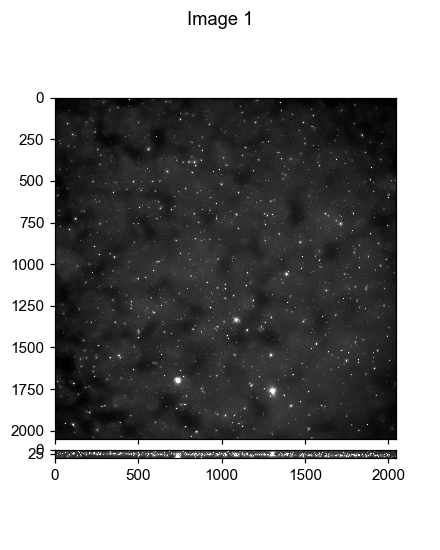

In [29]:
visual_tools.imshow_mark_3d_v2([dft_ref_im, _cls.im_488])

In [6]:
_cls._corr_bleedthrough(correction_channels=_cls.channels[:3])

- Start bleedthrough correction for channels:['750', '647', '561'].
-- loading bleedthrough correction profile from file:bleedthrough_correction_750_647_561_2048_2048.npy
float64
float64
uint16
-- corrected bleedthrough for channel 750 in 9.953s.
float64
float64
uint16
-- corrected bleedthrough for channel 647 in 9.672s.
float64
float64
uint16
-- corrected bleedthrough for channel 561 in 9.782s.


In [ ]:
6,124,348
7,762,952
7,762,980
12,809,284
illumination
12809284 - 7762952

In [30]:
9508000-4122980

5385020

<IPython.core.display.Javascript object>


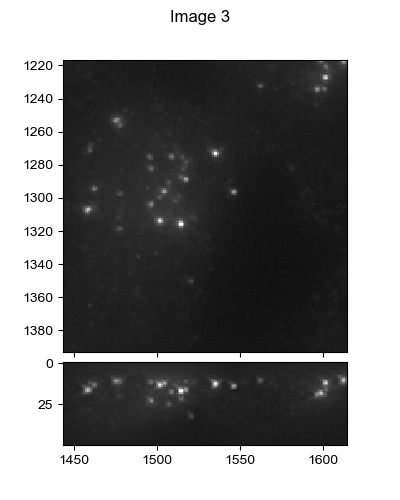

In [31]:
visual_tools.imshow_mark_3d_v2([_cls.im_750, _cls.im_647, _cls.im_561])

In [8]:
_cls._corr_illumination()

- Start illumination correction for channels:['750', '647', '561', '488'].
-- loading illumination correction profile from file:
	 750 illumination_correction_750_2048x2048.npy
	 647 illumination_correction_647_2048x2048.npy
	 561 illumination_correction_561_2048x2048.npy
	 488 illumination_correction_488_2048x2048.npy
uint16
float64
float64
-- corrected illumination for channel 750 in 4.781s.
uint16
float64
float64
-- corrected illumination for channel 647 in 4.781s.
uint16
float64
float64
-- corrected illumination for channel 561 in 4.750s.
uint16
float64
float64
-- corrected illumination for channel 488 in 4.843s.
- Finished illumination correction in 19.584s.


65535

<IPython.core.display.Javascript object>


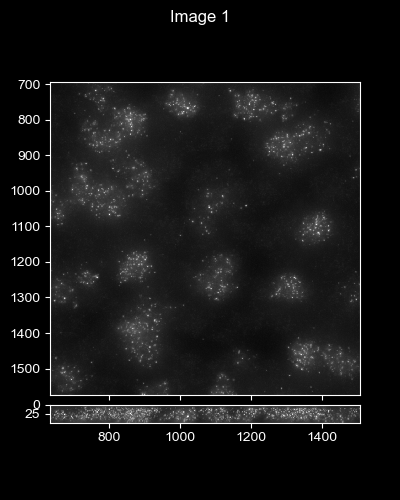

In [34]:
visual_tools.imshow_mark_3d_v2([_cls.im_750[]])

In [92]:
DaxProcesser._FindImageShape(dax_filename)

-- used channels: ['750', '647', '561', '488']
-- single image size: [  50 2048 2048]


array([  50, 2048, 2048])

In [73]:

        
_LoadInfFile(dax_filename.replace('.dax','.inf'))

{'binning': '1 x 1',
 'data type': '16 bit integers (binary, little endian)',
 'frame dimensions': '2048 x 2048',
 'number of frames': '200',
 'x_start': '1',
 'x_end': '2048',
 'y_start': '1',
 'y_end': '2048'}

In [30]:
_hal_info

<Element 'settings' at 0x0000021B000D4F48>

E:\Users\puzheng\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: This search is broken in 1.3 and earlier, and will be fixed in a future version.  If you rely on the current behaviour, change it to './illumination/shutters'
  """Entry point for launching an IPython kernel.


In [49]:
shutter_filename

'C:\\Users\\neoSTORM6\\Documents\\STORM6\\storm_control\\hal4000\\shutter_750_647_561_488_s50.xml'

['647']

In [64]:

_FindDaxChannels(dax_filename)

<Element 'settings' at 0x0000021B70F26638>
C:\Users\neoSTORM6\Documents\STORM6\storm_control\hal4000\shutter_750_647_561_488_s50.xml


['750', '647', '561', '488']

In [ ]:

sel_fov_ids = np.arange(19, 20) # batch1 in franklin

for _fov_id in sel_fov_ids:
    
    if 'bad_fovs_ids' in locals() and  _fov_id in bad_fovs_ids:
        continue
    

    
    # 2. Process image into candidate spots
    fov.parallel = True
    fov.combo_ref_id = 0
    fov._process_image_to_spots('combo', 
                                _load_common_reference=True, _load_with_multiple=False,
                                _save_images=_save_images,
                                _warp_images=False, 
                                _fit_spots=_fit_spots,
                                _overwrite_drift=False, _overwrite_image=_overwrite,
                                _overwrite_spot=_overwrite,
                                _verbose=True)
    # 3. Process image into candidate spots
    #fov.unique_ref_id = 0
    #fov._process_image_to_spots('unique', 
    #                            _load_common_reference=True, _load_with_multiple=False,
    #                            _save_images=_save_images, _warp_images=False, _verbose=True)
    # 4. Process DAPI image
    fov._load_dapi_image()

Get Folder Names: (ia.get_img_info.get_folders)
- Number of folders: 12
- Number of field of views: 168
- Importing csv format color_usage file: \\10.245.74.158\Chromatin_NAS_4\20220316-P_brain_CTP11-12-13_from_0304\Analysis\Color_Usage.csv
- header: ['Hyb', '750', '647', '561', '488', '405']
dict_keys(['H0U1', 'H1C2', 'H2C3', 'H3C4', 'H4C5', 'H5C6', 'H6C7', 'H7C8', 'H8C9', 'H9C10', 'H10C11', 'H11C12', 'H12C13', 'H13C14', 'H14C15', 'H15C16', 'H16C17', 'H17C18', 'H18C19', 'H19C20', 'H20C21', 'H21C22', 'H22C23', 'H23C24', 'H24C25', 'H25C26', 'H26C27', 'H27C28', 'H28C29', 'H29C30', 'H30C31', 'H31C32', 'H32C33', 'H33C34', 'H34C35', 'H35C36', 'H36C37', 'H37C38', 'H38C39', 'H39C40', 'H40C41', 'H41C42', 'H42C43', 'H43C44', 'H44C45', 'H45C46', 'H46C47', 'H47C48', 'H48C49', 'H49C50', 'H50C51', 'H51C52', 'H52C53', 'H53C54', 'H54C55', 'H55C56', 'H56C57', 'H57C58', 'H58C59', 'H59C60', 'H60C61', 'H61C62', 'H62C63', 'H63C64', 'H64C65', 'H65C66', 'H66U2', 'H67U3', 'H68U4', 'H69U5', 'H70U6', 'H71U7', 

In [22]:
    fov._load_dapi_image()

-- choose dapi images from folder: \\10.245.74.158\Chromatin_NAS_4\20220316-P_brain_CTP11-12-13_from_0304\H0U1.
- correct the whole fov for image: \\10.245.74.158\Chromatin_NAS_4\20220316-P_brain_CTP11-12-13_from_0304\H0U1\Conv_zscan_020.dax
-- loading illumination correction profile from file:
	 405 illumination_correction_405_2048x2048.npy
-- loading image from file:\\10.245.74.158\Chromatin_NAS_4\20220316-P_brain_CTP11-12-13_from_0304\H0U1\Conv_zscan_020.dax  in 45.859s
-- removing hot pixels for channels:['405'] in 12.828s
-- illumination correction for channels: 405, in 4.157s
-- warp image with drift:[0. 0. 0.] in 0.000s
-- finish correction in 64.031s
-- saving fov_info to file: \\franklin\SSD_01\Pu_Temp\20220316-P_brain_CTP11-12-13_from_0304_warp\Conv_zscan_020.hdf5
++ base attributes saved:['dapi_im'] in 9.732s.


array([[[ 4218,  4294,  4253, ...,  2962,  2745,  2729],
        [ 4419,  4280,  4069, ...,  2823,  2773,  2756],
        [ 4437,  4364,  4095, ...,  3169,  2853,  2706],
        ...,
        [13055, 12663, 12271, ..., 11717, 11431, 12096],
        [12399, 12399, 12364, ..., 11371, 11458, 11957],
        [12675, 12668, 12558, ..., 11199, 11445, 12123]],

       [[ 4034,  3955,  3649, ...,  2890,  2715,  2756],
        [ 4031,  3771,  3982, ...,  2820,  2962,  2751],
        [ 4575,  3811,  4160, ...,  2808,  2706,  2431],
        ...,
        [12262, 12287, 11820, ..., 11874, 11510, 11588],
        [12162, 11941, 11981, ..., 11289, 11217, 11957],
        [12594, 12587, 12482, ..., 11694, 11697, 11949]],

       [[ 4221,  4142,  3885, ...,  2790,  2557,  2731],
        [ 3923,  3503,  4025, ...,  2659,  2631,  2526],
        [ 3995,  4041,  3800, ...,  2575,  2678,  2606],
        ...,
        [13055, 12738, 12047, ..., 11556, 11990, 11842],
        [12399, 12856, 11752, ..., 12011, 114

In [ ]:
sel_ids = np.array([3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,68,69,70,71,72,73,74,75,76,101,102,165])



    for _id in sel_ids:
        _ind = _ids.index(_id)


In [6]:
with h5py.File(fov.save_filename, 'r') as _f:
    _grp = _f.require_group('combo')
    _ids = list(_grp['ids'][:])
    _flags = _grp['flags'][:]
    

In [7]:
_flags

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=uint8)

In [17]:
sel_ids = np.array([3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,68,69,70,71,72,73,74,75,76,101,102,165])

with h5py.File(fov.save_filename, 'r') as _f:
    _grp = _f.require_group('combo')
    _ids = list(_grp['ids'][:])
    sel_ims = []
    sel_raw_spots = []
    for _id in sel_ids:
        _ind = _ids.index(_id)
        sel_ims.append(_grp['ims'][_ind])
        sel_raw_spots.append(_grp['raw_spots'][_ind])

In [17]:
coord_dict = {
    'coords': [],#np.fliplr(sel_spots[:,1:4]),
    'class_ids': [],#sel_ids,
}

for _i, _spots in enumerate(sel_raw_spots):
    _spots = _spots[_spots[:,0]>0]
    if len(_spots) > 0:
        coord_dict['coords'].extend(list(np.fliplr(_spots[:,1:4])))
        #coord_dict['coords'].extend(list(np.fliplr(_crop.crop_coords(_spots.to_coords()[_sel_inds]))))
        coord_dict['class_ids'].extend(list(np.ones(len(_spots),dtype=np.int32) * _i))
    

In [32]:
plt.style.use('dark_background')

In [33]:
visual_tools.imshow_mark_3d_v2(sel_ims, given_dic=coord_dict, image_names=sel_inds)

NameError: name 'sel_ims' is not defined

In [20]:
_bits = np.array(_ids)[sel_inds]

<IPython.core.display.Javascript object>


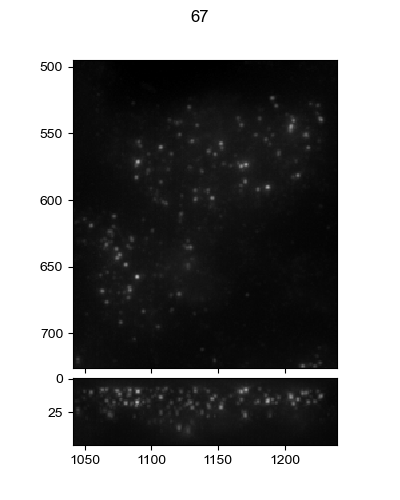

In [29]:
visual_tools.imshow_mark_3d_v2([fov.dapi_im]+list(sel_ims), 
                               image_names=['dapi']+list(_bits), 
                               min_max_default=[2000,15000])